In [1]:
import pandas as pd
import numpy as np
from scipy.cluster import vq

In [2]:
UN_frame = pd.read_csv('Downloads/un.csv')
UN_frame.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = UN_frame[['lifeMale','lifeFemale','infantMortality', 'GDPperCapita']].dropna()

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
c = np.log(df.GDPperCapita)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


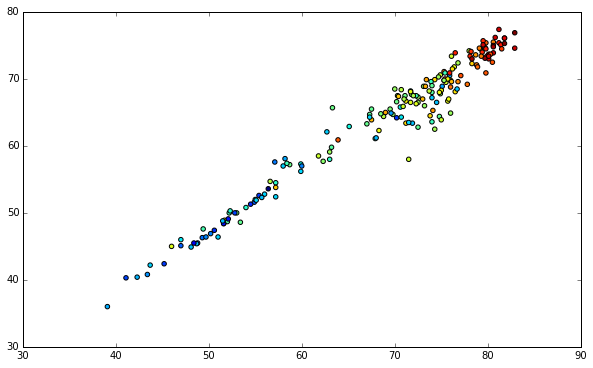

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df.lifeFemale, df.lifeMale, c=c)

(array([  1.,  10.,  14.,  30.,  26.,  28.,  26.,  16.,  21.,  16.]),
 array([  3.58351894,   4.29069514,   4.99787134,   5.70504754,
          6.41222373,   7.11939993,   7.82657613,   8.53375233,
          9.24092853,   9.94810473,  10.65528093]),
 <a list of 10 Patch objects>)

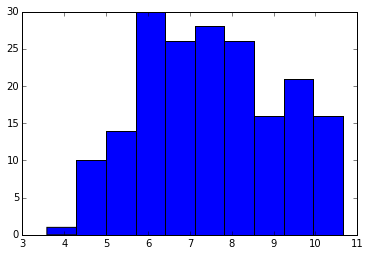

In [20]:
plt.hist(np.log(df.GDPperCapita))

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


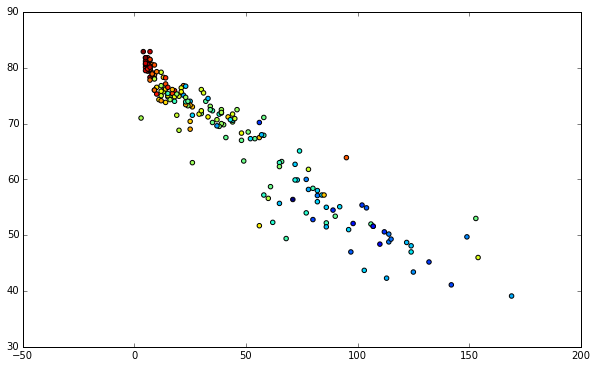

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df.infantMortality, df.lifeFemale, c=c)

In [35]:
X = df[['lifeMale','lifeFemale','infantMortality']].as_matrix()

In [40]:
X

array([[  45. ,   46. ,  154. ],
       [  68. ,   74. ,   32. ],
       [  67.5,   70.3,   44. ],
       [  44.9,   48.1,  124. ],
       [  69.6,   76.8,   22. ],
       [  67.2,   74. ,   25. ],
       [  75.4,   81.2,    6. ],
       [  73.7,   80.1,    6. ],
       [  66.5,   74.5,   33. ],
       [  70.5,   77.1,   14. ],
       [  71.1,   75.3,   18. ],
       [  58.1,   58.2,   78. ],
       [  73.6,   78.7,    9. ],
       [  64.4,   74.8,   15. ],
       [  73.9,   80.6,    7. ],
       [  73.4,   76.1,   30. ],
       [  52.4,   57.2,   84. ],
       [  51.6,   54.9,  104. ],
       [  59.8,   63.2,   66. ],
       [  70.5,   75.9,   13. ],
       [  48.9,   51.7,   56. ],
       [  63.4,   71.2,   42. ],
       [  73.4,   78.1,    9. ],
       [  67.8,   74.9,   16. ],
       [  45.1,   47. ,   97. ],
       [  45.5,   48.8,  114. ],
       [  52.6,   55.4,  102. ],
       [  54.5,   57.2,   58. ],
       [  76.1,   81.8,    6. ],
       [  65.5,   67.5,   41. ],
       [  

In [81]:
Y, distortion = vq.kmeans(X, 5)

In [44]:
Y

array([[  49.30434783,   52.00434783,  102.45652174],
       [  70.83      ,   76.99888889,   13.07777778],
       [  63.46538462,   67.69230769,   46.92307692]])

In [43]:
X[0]

array([  45.,   46.,  154.])

In [66]:
np.sqrt(np.sum((X[0]-Y[0])**2))

52.070238661382263

In [67]:
np.sqrt(np.sum((X[0]-Y[1])**2))

146.58510404674502

In [69]:
np.linalg.norm(X[0]-Y[2])

110.80159790198486

In [82]:
arr = []
for y in Y:
    arr.append( ((X - y)**2).sum(axis=-1)) 

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


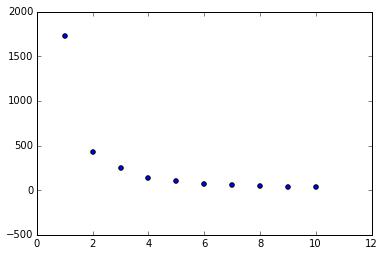

In [84]:
for i in range(1,11):
    Y, distortion = vq.kmeans(X, i)
    arr = []
    for y in Y:
        arr.append( ((X - y)**2).sum(axis=-1))
    s = np.sum(np.amin(np.array(arr), axis=0))/188
    plt.scatter([i], [s])

In [85]:
frame = pd.read_csv('Downloads/samsungdata.csv')
frame.head(1)

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing


In [88]:
[print(x) for x in frame.columns]

Unnamed: 0
tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tG

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [92]:
X = frame[frame.columns[1:-2]]
Y = frame.activity

In [97]:
clf.fit(X[:5000], Y[:5000])

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.89073129251700678

In [102]:
inds = np.argsort(clf.feature_importances_)[::-1]

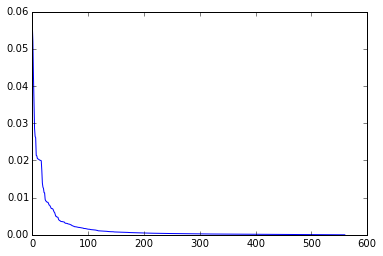

In [106]:
plt.plot(clf.feature_importances_[inds])
#plt.loglog()

In [1]:
cols = frame.columns[1:-2]
for i in range(10):
    [inds]

NameError: name 'frame' is not defined

In [129]:
n_cols = cols[inds[:25]]

In [131]:
clf = RandomForestClassifier(max_depth=10)

In [132]:
X = frame[n_cols]
Y = frame.activity

In [133]:
clf.fit(X[:5000], Y[:5000])

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
clf.score(X[:5000], Y[:5000])

0.99399999999999999

In [135]:
clf.score(X[5000:], Y[5000:])

0.83503401360544216